In [173]:
#IMPORT THE LIBRARIES AND LOAD THE DATASET


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

df=pd.read_csv("data.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [11]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


To check for null values

In [12]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [13]:
df.isnull().sum() 

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

To get rid of coloumns which are not necessary for analysis

In [28]:

df = df.drop(['invoice_no', 'customer_id', 'invoice_date'], axis=1, inplace=True)


In [29]:
df.columns
df

,gender,age,category,quantity,price,payment_method,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM
4,Female,53,Books,4,60.60,Cash,Kanyon
...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,Kanyon
99453,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul
99454,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity
99455,Male,56,Technology,4,4200.00,Cash,Istinye Park


Checking which gender visits the mall often and using a count plot to see the result

In [31]:
print(df.shape)
df['gender'].value_counts()

(99457, 7)


Female    59482
Male      39975
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

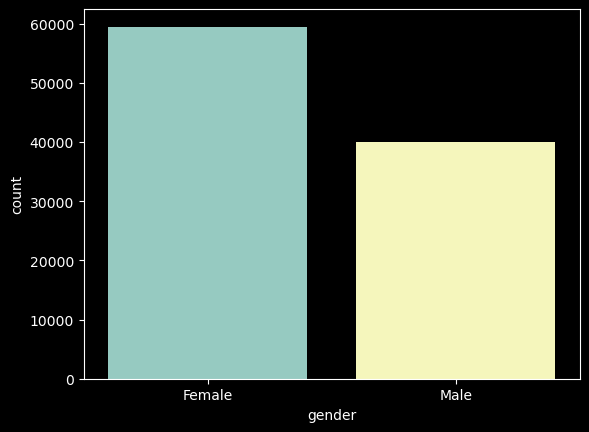

In [147]:
sns.countplot(data=df, x='gender')

Since we want a numeric data and strings cannot be used for sns plots.
Therefore we create dummies for the "gender" column

In [34]:


gender_dummies = pd.get_dummies(df.gender)
gender_dummies


,Female,Male
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
99452,1,0
99453,0,1
99454,0,1
99455,0,1


In [152]:
#merge the two dataframes

df = pd.concat([df, gender_dummies], axis = 1)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Female,Male
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1,0
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,0,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,0,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1,0
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1,0
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,0,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,0,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,0,1


Plotting a bar graph for category with respect to Male and Female respectively

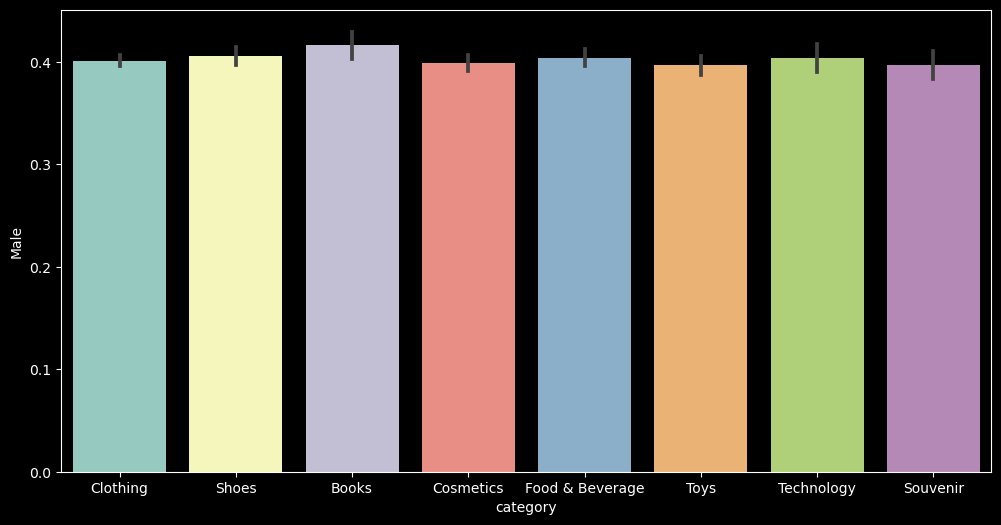

In [153]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'category', y = 'Male', data=df)

plt.show()

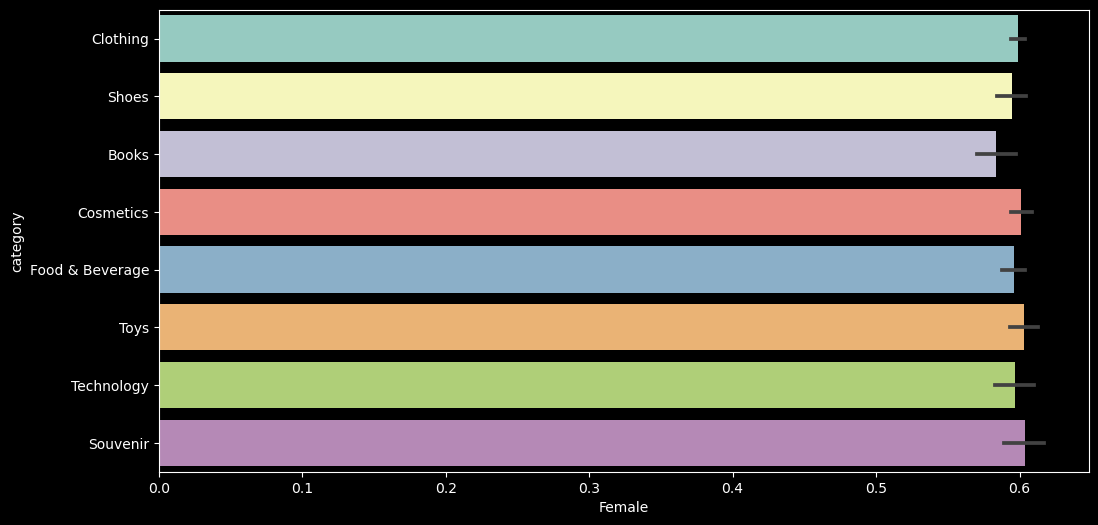

In [154]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Female', y='category', data=df) #one variable is categorical and other is numeric

plt.show()

In [85]:
a=df.groupby('category').Female.mean() #mean value is the height of the bar plot
a

category
Books              0.583417
Clothing           0.598834
Cosmetics          0.600782
Food & Beverage    0.595831
Shoes              0.594678
Souvenir           0.603521
Technology         0.596677
Toys               0.603252
Name: Female, dtype: float64

Counting the number of malls and the most popular among them

In [155]:
mall = pd.DataFrame(df['shopping_mall'].value_counts())
mall

,shopping_mall
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914
Emaar Square Mall,4811


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mall of Istanbul'),
  Text(1, 0, 'Kanyon'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Zorlu Center'),
  Text(6, 0, 'Cevahir AVM'),
  Text(7, 0, 'Forum Istanbul'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Emaar Square Mall')])

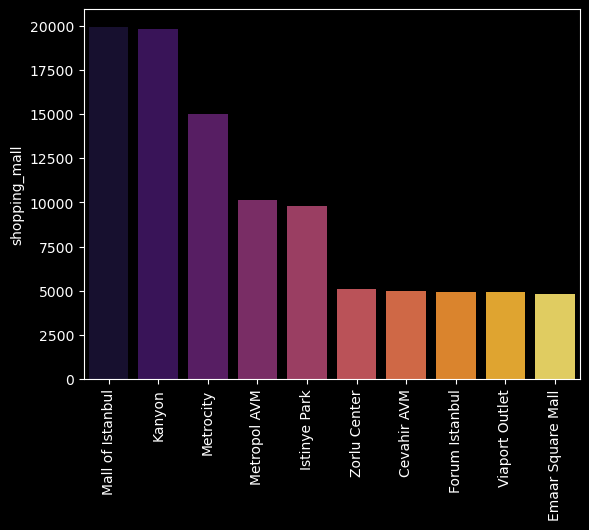

In [156]:
#Mall of istanbul has most customers
sns.barplot(x = mall.index  , y = mall['shopping_mall'], palette = 'inferno')
plt.xticks(rotation=90)


PLOTTING DIFFERENT PAYMENT METHODS


In [100]:
payment_df = pd.DataFrame(df['payment_method'].value_counts())
payment_df

,payment_method
Cash,44447
Credit Card,34931
Debit Card,20079


<Axes: ylabel='payment_method'>

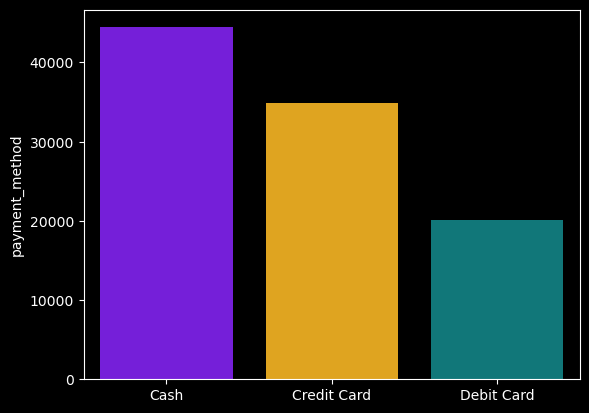

In [157]:
sns.barplot(x =payment_df.index , y = payment_df.payment_method, palette = 'prism_r')

PLOT FOR PRICE DEPENDING ON EACH CATEGORY

<Axes: xlabel='category', ylabel='price'>

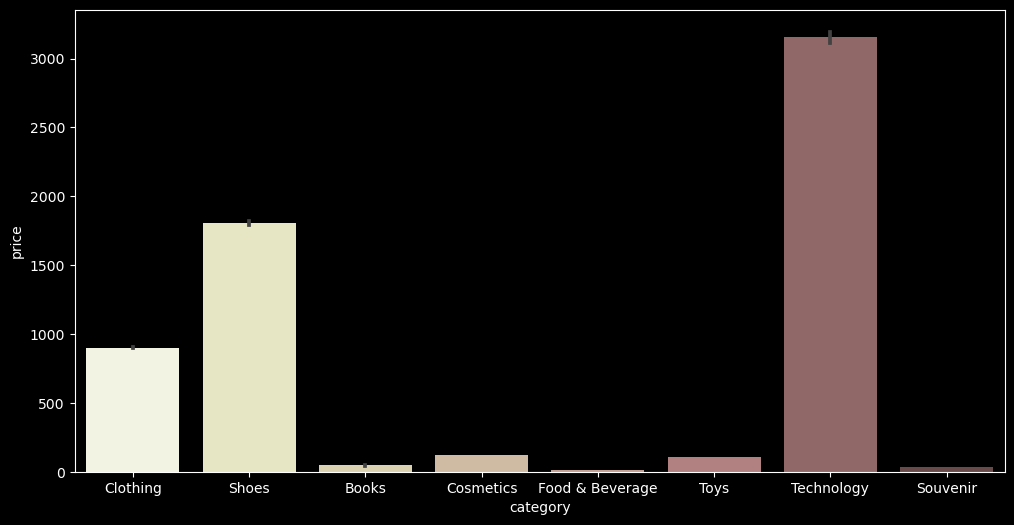

In [158]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['category'] , y = df['price'], palette = 'pink_r') #the highest average cost sold

PLOTTING A HISTOGRAM TO KNOW THE FREQUENCY FOR AGE COL

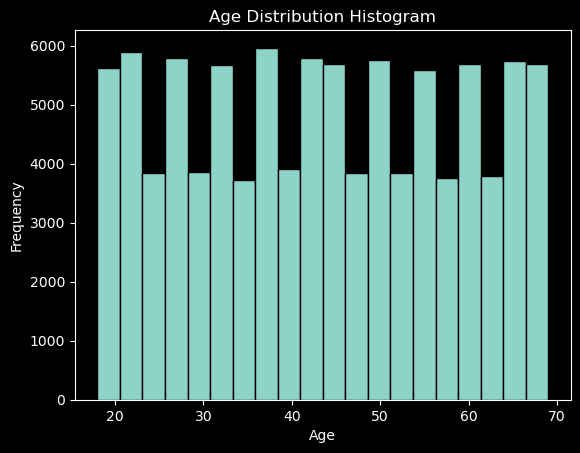

In [159]:
plt.hist(df['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.show()

In [112]:
df['quantity'].value_counts()

3    20149
5    19990
2    19828
1    19767
4    19723
Name: quantity, dtype: int64

PLOTTING HEATMAP TO CHECK FOR ANY CORRELATION BETWEEN THE COLUMNS


C:\Users\Admin\AppData\Local\Temp\ipykernel_15080\1529596750.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=df.corr()


<Axes: >

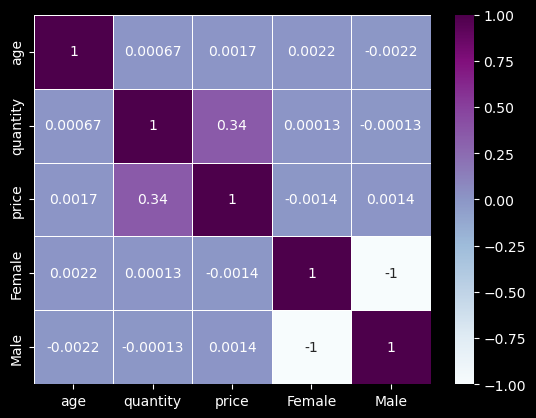

In [160]:
a=df.corr()

sns.heatmap(a, annot=True, linewidth=.5, cmap="BuPu")



WE UNDERSTAND FROM THE ABOVE HEAT MAP THAT PRICE AND QUANTITY ARE THE FEATURES THAT ARE POSITIVELY COORELATED

In [142]:
a

,age,quantity,price,Female,Male
age,1.000000,0.000667,0.001694,0.002150,-0.002150
quantity,0.000667,1.000000,0.344880,0.000131,-0.000131
price,0.001694,0.344880,1.000000,-0.001450,0.001450
Female,0.002150,0.000131,-0.001450,1.000000,-1.000000
Male,-0.002150,-0.000131,0.001450,-1.000000,1.000000


In [169]:
df.describe()


,age,quantity,price,Female,Male
count,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,0.598068,0.401932
std,14.990054,1.413025,941.184567,0.490291,0.490291
min,18.000000,1.000000,5.230000,0.000000,0.000000
25%,30.000000,2.000000,45.450000,0.000000,0.000000
50%,43.000000,3.000000,203.300000,1.000000,0.000000
75%,56.000000,4.000000,1200.320000,1.000000,1.000000
max,69.000000,5.000000,5250.000000,1.000000,1.000000


Inference from the Analysis
Total Customers = 99,457
Total Females = 59,482
Total Males = 39,975

Maximum customers buys 3 quantities per purchase
Max Average total bill in Technology
Min Average total bill in sovenier/food and beverages
Maximum People pays through Cash
Maximum people shop from Mall of Istanbul
Very few people shop from Emaar Square Mall
Max Average Sales of Souvenir and Toys is from Females 
Max Average Sales of Books is from Males